### Question 1: Perform the clustering 

Following is a part of data from Happy Planet Index website, which provides some information about the 65 countries in 2016. 

In [41]:
import pandas as pd

data = pd.read_csv("happyplanet2016.csv")
print(data.head())

      Country        Region  Life_Expectancy  Well_Being  Happy_Life_Years  \
0  Costa Rica      Americas           79.076         7.3         48.174792   
1      Mexico      Americas           76.411         7.3         44.262083   
2    Colombia      Americas           73.673         6.4         35.070893   
3     Vietnam  Asia Pacific           75.477         5.5         32.770246   
4      Panama      Americas           77.215         6.9         42.076665   

   Environmental_Footprint  Inequality  HappyPlanetIndex        GDP_PC  \
0                     2.84    0.145568         44.714071   9733.396931   
1                     2.89    0.187699         40.697292   9703.371017   
2                     1.87    0.235044         40.695011   7885.061292   
3                     1.65    0.185921         40.307589   1754.547974   
4                     2.79    0.189979         39.502577  10138.521129   

   Population  GINIindex  
0     4654148      48.61  
1   122070963      48.07  
2    

1. Use the country names as the labels. Remove the Region information, then perfrom a Hierarchical clustering with ward linkage. Plot the dendrogram. (20)

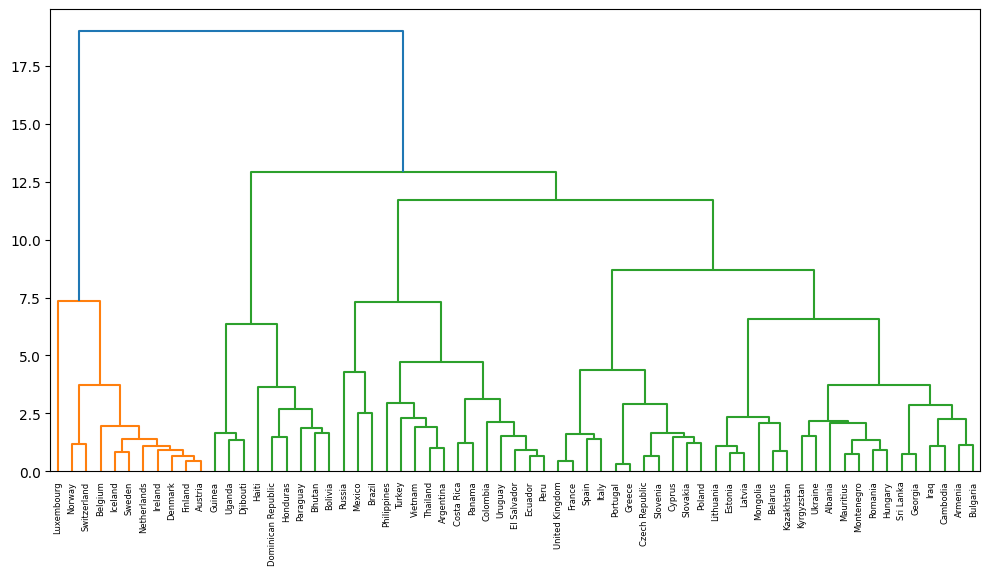

In [35]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

labels = data.Country

X = data.drop(['Region', 'Country'], axis = 1)
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

linkage_matrix = linkage(X_scaled, method='ward') # ward linkage

plt.figure(figsize = (12,6))

dendrogram(linkage_matrix, labels=labels.values) 

plt.show()

2. Show another dendrogram with complete linkage. Choose a cluster number to color the plot. (5)

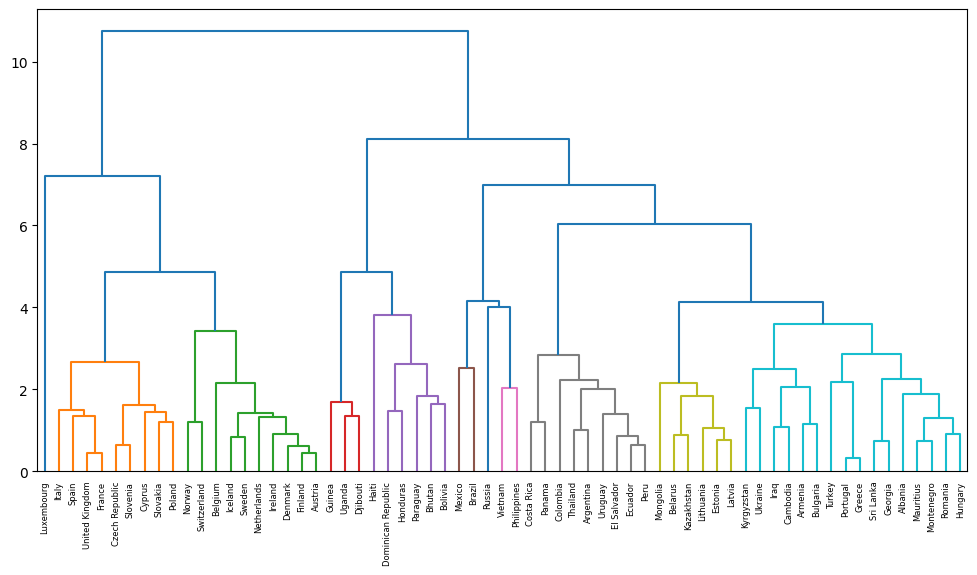

In [36]:
linkage_matrix = linkage(X_scaled, method='complete') # complete linkage

plt.figure(figsize = (12,6))

dendrogram(linkage_matrix, labels=labels.values, color_threshold=4) 

plt.show()

3. Perform the k-means clustering. Use the same cluster number in the previous question. Plot the clustering with "HappyPlanetIndex" and "Life_Expectancy". (20)

[0 0 0 0 0 0 0 1 2 0 1 0 1 0 0 0 0 1 2 2 1 1 1 1 2 1 1 1 3 1 2 2 3 2 1 1 2
 2 1 3 2 2 2 2 2 3 2 2 1 1 2 2 3 2 2 2 3 2 2 2 2 3 3 2 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


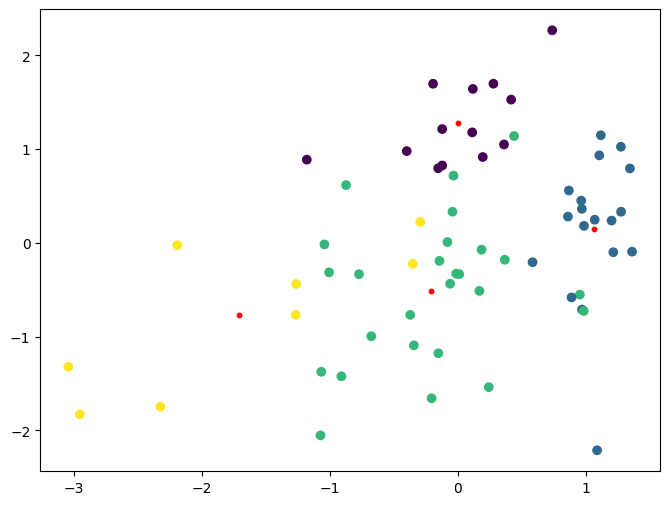

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 4400)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(kmeans_labels)

plt.figure(figsize = (8, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,5], c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,5], s = 10, c = 'red')
plt.show()

### Question 2: Perform the PCA 

1. Use the same data from Question 1. Remove the "HappyPlanetIndex" since it is a linear combination of all the other variables. Perform the PCA and plot the explained variance ratio for PCs. (20)

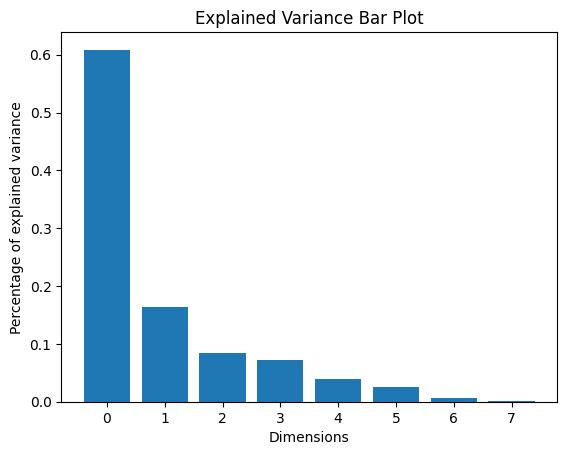

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

labels = data.Country

X = data.drop(['Region', 'Country', 'HappyPlanetIndex'], axis = 1)

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

pca = PCA()
# transformed data, x_pca is now the pca columns
x_pca = pca.fit_transform(X_scaled)

# scaled eigenvalues so their sum is equal to one
explained_variance_ratio = pca.explained_variance_ratio_ 
eigenvalues = pca.explained_variance_ 

plt.bar(range(len(eigenvalues)), explained_variance_ratio)
plt.title('Explained Variance Bar Plot')
plt.xlabel('Dimensions')
plt.ylabel('Percentage of explained variance')
plt.show()


2. Use the code in the code demonstration and plot the bi-plot for the PCA. Discuss how the features are related with each other. (10)

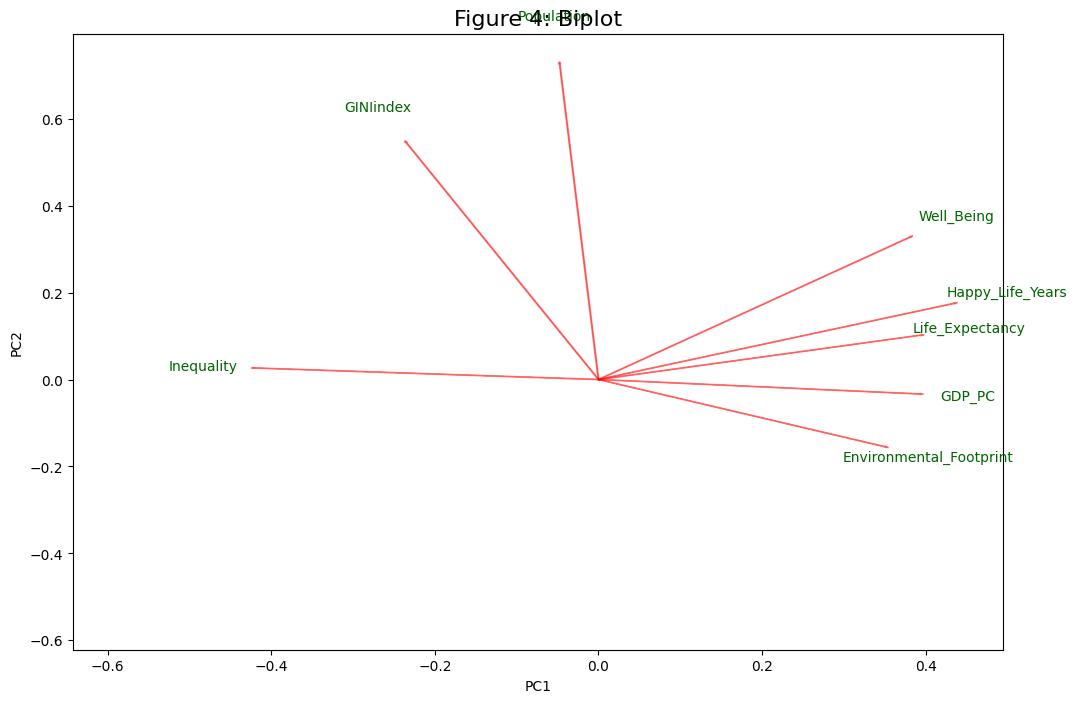

In [39]:
PC1 = pca.components_[:,0] # change index to look at other pcs
PC2 = pca.components_[:,1]

def biplot(score,coef,labels=None):
 
    n = coef.shape[0]
    scalex = 1.0/(PC1.max() - PC2.min())
    scaley = 1.0/(PC1.max() - PC2.min())
 
    plt.scatter(PC1 * scalex,
                PC2 * scaley, c = 'w')
 
    for i in range(n):
        plt.arrow(0, 0, 
                  coef[i,0], 
                  coef[i,1],
                  color = 'red',
                  alpha = 0.5)
 
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkgreen', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

plt.figure(figsize=(12,8))
plt.title("Figure 4: Biplot",
          fontsize=16)
feature_names = X.columns

biplot(pca, 
       np.transpose(pca.components_), 
       list(feature_names))

Since GINIIndex and Inequality vectors point in the opposite direction from Environmental_Footprint, GDP_PC, Life_Expectancy, Happy_Life_Years, and Well_Being vectors, GINIIndex and Inequality are both negatively correlated with Environmental_Footprint, GDP_PC, Life_Expectancy, Happy_Life_Years, and Well_Being. GINIIndex and Inequality vectors are positively correlated with each other and Environmental_Footprint, GDP_PC, Life_Expectancy, Happy_Life_Years, and Well_Being are positively correlated with each other. Inequality is one of the longest vectors and thus is very important to the principal components.

3. Fit a linear regression with the first three PCs and report the MSE. (10)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data.drop(['Region', 'Country', 'HappyPlanetIndex'], axis = 1)

y = data.HappyPlanetIndex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4400)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

lm_pca = LinearRegression()
lm_pca.fit(X_train_pca, y_train)
y_pred_pca = lm_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)

print("MSE pca: ", mse_pca)

MSE pca:  47.52847813961134


### Question 3: Compare the clustering methods

1. Discuss the difference between Hierarchical clustering and kmeans clustering. Please list at least three differences. (10) 

Hierarchical clustering does not have a predefined number of clusters, is not sensitive to initialization, and is robust to noise due to complete linkage. However, it's also computationally  and memory intensive because there are many pairwise distance calculations that must be stored. In contrast, k-means clustering is computationally efficient and more flexible than hierarchical clustering, but is sensitive to initialization and outliers and needs to have a pre-determined number of clusters.

2. Please summarize the pros and cons for using PCA instead of original data. (5)

PCA is a dimensionality reduction technique used to simplify high-dimensional data. It identifies directions in the data that represent the maximum amount of variation, and then transforms the original variables into a new set of uncorrelated variables called principal components.
The principal components are ordered in terms of the amount of variation they explain, with the first component explaining the most variation and the last component explaining the least. Pros of PCAs is that they are good for simplifying high-dimensional data with many features and potential collinearity among variables. Cons are that PCAs assume linearity in the dataset, so if the data is non linear the results could be difficult to interpret. Furthermore, if the relationship between the original variables is not well understood it can be difficult to understand the PCA results, as they will further simplify the data.